In [ ]:
#importing the neccessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#mounting on google drive

from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
%cd gdrive/MyDrive/MainProject

[Errno 2] No such file or directory: 'gdrive/MyDrive/MainProject'
/content/gdrive/MyDrive/MainProject


In [ ]:
#reading and checking the basic structure of the data
data = pd.read_csv("train_new1.csv",encoding='latin-1')
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,no
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,no
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,no
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,no
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,no


In [ ]:
# Dropping the redundant looking columns 
to_drop = ["id","qid1","qid2"]
data = data.drop(data[to_drop], axis=1)
data.head()

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,no
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,no
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,no
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,no
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,no


In [ ]:
# using info method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   question1     404290 non-null  object
 1   question2     404290 non-null  object
 2   is_duplicate  404290 non-null  object
dtypes: object(3)
memory usage: 9.3+ MB


In [ ]:
# statistical info of dataset
data.describe()

,question1,question2,is_duplicate
count,404290,404290,404290
unique,290457,299175,2
top,How do I improve my English speaking?,How can you look at someone's private Instagra...,no
freq,50,120,255027


In [ ]:
# Mapping Values for labels  
data['is_duplicate'] = data['is_duplicate'].map({'no': 0, 'yes': 1}) 
data.head(8)

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,How can I be a good geologist?,What should I do to be a great geologist?,1


Text(0, 0.5, 'Number of Data points')

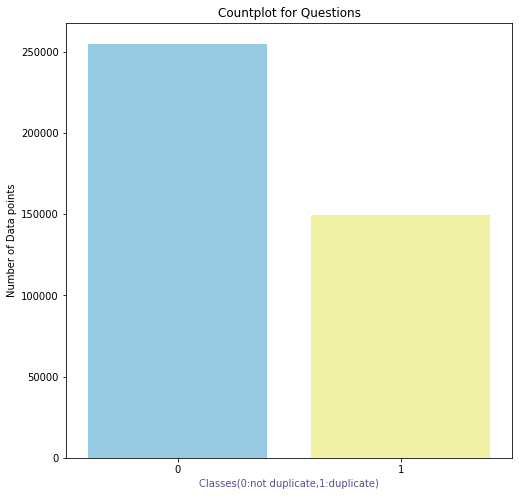

In [ ]:
#Palette
cols= ["#89cff0", "#fdfd96"] 
plt.figure(figsize=(8,8))
fg = sns.countplot(x= data["is_duplicate"], palette= cols)
fg.set_title("Countplot for Questions")
fg.set_xlabel("Classes(0:not duplicate,1:duplicate)", color="#58508d")
fg.set_ylabel("Number of Data points")

In [ ]:
# split dataset
X = data.iloc[:, 0:2]
y = data.iloc[:, 2]

In [ ]:
from sklearn.model_selection import train_test_split
# Splitting the testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
# libraries for performing NLP 

import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import spacy
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
# Cleaning the messages
def Cleaning(text):
  corpus = []
  wnl = WordNetLemmatizer()

  for sms_string in list(text):

   # Cleaning special character from the sms
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string)

   # Converting the entire sms into lower case
    message = message.lower()

    # to remove numeric digits from string
    message = ''.join([i for i in message if not i.isdigit()])

    # Tokenizing the sms by words
    words = message.split()
    
    # Removing the stop words
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

    # Lemmatizing the words
    lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

    # Joining the lemmatized words
    message = ' '.join(lemmatized_words)

   # Building a corpus of messages
    corpus.append(message)
  return corpus


In [ ]:
print(X_train['question1'])

352886                  What are some of the short stories?
134949                       Is this a German Shepherd dog?
168419    What is the most important lesson ever learned...
402543    Which ad networks for mobile native ads have a...
13551         What should I do to be an athlete in a month?
                                ...                        
259178                     How do you feed a Venus flytrap?
365838    I'm an Electrical Engineering student of Sixth...
131932    What is the best DSLR camera for a beginner to...
146867      What is a good computer desk for dual monitors?
121958    Focusing & Concentrating: How do I keep myself...
Name: question1, Length: 323432, dtype: object


In [ ]:
xtrain1=Cleaning(X_train['question1'])

In [ ]:
xtrain2=Cleaning(X_train['question2'])

In [ ]:
xtest1=Cleaning(X_test['question1'])

In [ ]:
xtest2=Cleaning(X_test['question2'])

In [ ]:
with open ('text.txt', 'w') as file:  
    for line_1 in xtrain1:  
        file.write(line_1)  
        file.write('\n')  